In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

In [3]:
iris=load_iris()
irisDF=pd.DataFrame(iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(irisDF)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [5]:
irisDF['cluster']=kmeans.labels_
irisDF['target']=iris.target
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [11]:
irisDF.groupby(['target','cluster']).count()['sepal_length']

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

In [12]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


Text(0.5, 1.0, '3 Clusters Visualization by 2 PCA Componenets')

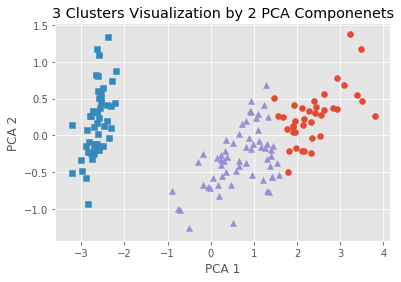

In [35]:
marker0_index=irisDF[irisDF['cluster']==0].index
marker1_index=irisDF[irisDF['cluster']==1].index
marker2_index=irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_index,'pca_x'],y=irisDF.loc[marker0_index,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_index,'pca_x'],y=irisDF.loc[marker1_index,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_index,'pca_x'],y=irisDF.loc[marker2_index,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Componenets')

In [38]:
from sklearn.datasets import make_blobs
%matplotlib inline

X,y=make_blobs(n_samples=200, n_features=2, centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [39]:
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


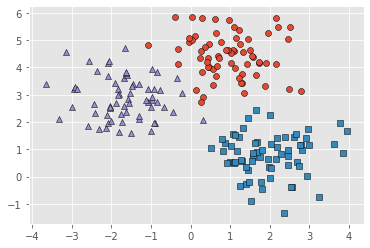

In [48]:
target_list=np.unique(y)
markers=['o','s','^','P','D','H','x']

for target in target_list:
    target_cluster=clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',marker=markers[target])
plt.show()

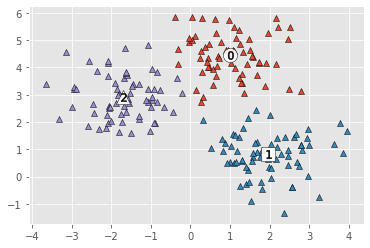

In [54]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=200,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels
centers=kmeans.cluster_centers_
unique_label=np.unique(cluster_labels)

for label in unique_label:
    label_cluster=clusterDF[clusterDF['kmeans_label']==label]
    center_x_y=centers[label]
    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[target])
    
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',alpha=0.9,edgecolor='k',marker=markers[label])
    plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',edgecolor='k',marker='$%d$' %label)


In [56]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score


In [58]:
score_samples=silhouette_samples(iris.data,irisDF['cluster'])
print(score_samples.shape)

(150,)


In [65]:
irisDF['silhouette_coeff']=score_samples
average_score=silhouette_score(iris.data,irisDF['cluster'])
print(average_score)
print(irisDF.head(3))

0.5528190123564091
   sepal_length  sepal_width  petal_length  petal_width  cluster  target  \
0           5.1          3.5           1.4          0.2        1       0   
1           4.9          3.0           1.4          0.2        1       0   
2           4.7          3.2           1.3          0.2        1       0   

      pca_x     pca_y  silhouette_coeff  
0 -2.684126  0.319397          0.852955  
1 -2.714142 -0.177001          0.815495  
2 -2.888991 -0.144949          0.829315  


In [69]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

In [70]:
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=.8,random_state=0)

from sklearn.cluster import MeanShift
meanshift=MeanShift(bandwidth=0.9)
cluster_labels=meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2 3 4 5 6 7]


In [71]:
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [72]:
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X,quantile=0.2)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.444


In [76]:
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

best_bandwidth=estimate_bandwidth(X,quantile=0.2)
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2]


In [77]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

In [79]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       1              45
        2               5
2       2              50
Name: gmm_cluster, dtype: int64


In [80]:
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)
transformation=[[0.6083549,-0.636667341],[-0.40887718,0.85253229]]
X_aniso=np.dot(X,transformation)
clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y


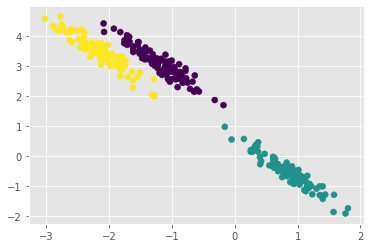

In [85]:
plt.scatter(clusterDF.iloc[:,0],clusterDF.iloc[:,1],c=clusterDF['target'])

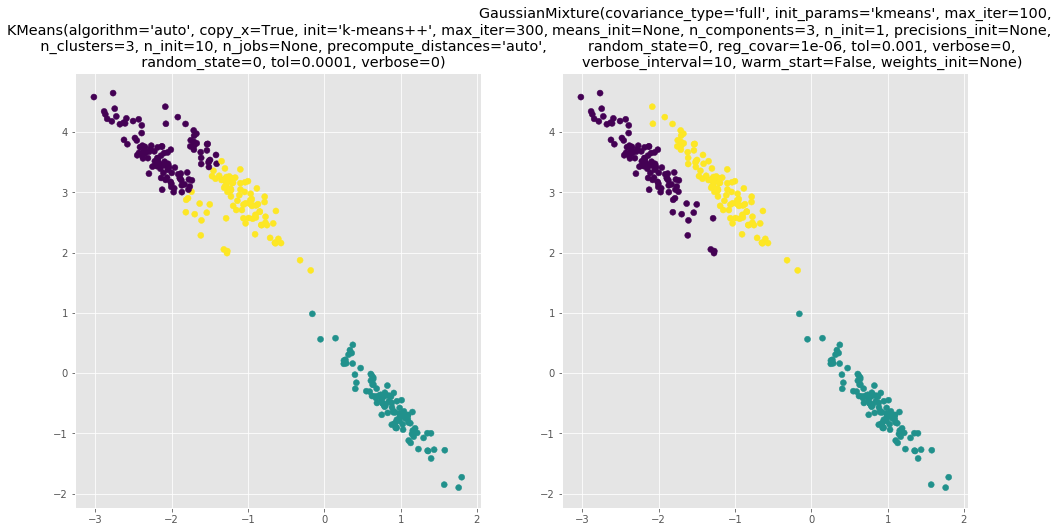

In [91]:
kmeans=KMeans(n_clusters=3,random_state=0)
gmm=GaussianMixture(n_components=3,random_state=0)
fig,axes=plt.subplots(1,2,figsize=(16,8))
clustering=[kmeans,gmm]
for ax,cluster in zip(axes.ravel(),clustering):
    cluster_label=cluster.fit_predict(X_aniso)
    ax.scatter(clusterDF.iloc[:,0],clusterDF.iloc[:,1],c=cluster_label)
    ax.set_title('{}'.format(cluster))
plt.show()

array([0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2,
       0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2])